In [310]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

1. Mô tả dữ liệu bằng các giá trị số :

Bước 01 :

In [311]:
df = pd.read_csv('babies.txt', delim_whitespace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2060\2342794486.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('babies.txt', delim_whitespace=True)


In [312]:
smoke_data = df[df['smoke'] == 1]
no_smoke_data = df[df['smoke'] == 0]

In [313]:
smoke_stats = {
    'Số lượng': len(smoke_data),
    'Min': smoke_data['bwt'].min(),
    'Max': smoke_data['bwt'].max(),
    'Mean': smoke_data['bwt'].mean(),
    'Sd': smoke_data['bwt'].std(),
    'Var': smoke_data['bwt'].var(),
    'Median': smoke_data['bwt'].median(),
    'Quantile 0%': smoke_data['bwt'].quantile(0),
    'Quantile 25%': smoke_data['bwt'].quantile(0.25),
    'Quantile 50%': smoke_data['bwt'].quantile(0.5),
    'Quantile 75%': smoke_data['bwt'].quantile(0.75),
    'IQR': smoke_data['bwt'].quantile(0.75) - smoke_data['bwt'].quantile(0.25),
    'Skewness': smoke_data['bwt'].skew(),
    'Kurtosis': smoke_data['bwt'].kurt()
}

In [314]:
no_smoke_stats = {
    'Số lượng': len(no_smoke_data),
    'Min': no_smoke_data['bwt'].min(),
    'Max': no_smoke_data['bwt'].max(),
    'Mean': no_smoke_data['bwt'].mean(),
    'Sd': no_smoke_data['bwt'].std(),
    'Var': no_smoke_data['bwt'].var(),
    'Median': no_smoke_data['bwt'].median(),
    'Quantile 0%': no_smoke_data['bwt'].quantile(0),
    'Quantile 25%': no_smoke_data['bwt'].quantile(0.25),
    'Quantile 50%': no_smoke_data['bwt'].quantile(0.5),
    'Quantile 75%': no_smoke_data['bwt'].quantile(0.75),
    'IQR': no_smoke_data['bwt'].quantile(0.75) - no_smoke_data['bwt'].quantile(0.25),
    'Skewness': no_smoke_data['bwt'].skew(),
    'Kurtosis': no_smoke_data['bwt'].kurt()
}

In [315]:
print("Thông tin về trẻ có bà mẹ hút thuốc :")
for key, value in smoke_stats.items():
    print(f"{key}: {value:.1f}")

print("\nThông tin về trẻ có bà mẹ không hút thuốc :")
for key, value in no_smoke_stats.items():
    print(f"{key}: {value:.1f}")

Thông tin về trẻ có bà mẹ hút thuốc :
Số lượng: 484.0
Min: 58.0
Max: 163.0
Mean: 114.1
Sd: 18.1
Var: 327.6
Median: 115.0
Quantile 0%: 58.0
Quantile 25%: 102.0
Quantile 50%: 115.0
Quantile 75%: 126.0
IQR: 24.0
Skewness: -0.0
Kurtosis: 0.0

Thông tin về trẻ có bà mẹ không hút thuốc :
Số lượng: 742.0
Min: 55.0
Max: 176.0
Mean: 123.0
Sd: 17.4
Var: 302.7
Median: 123.0
Quantile 0%: 55.0
Quantile 25%: 113.0
Quantile 50%: 123.0
Quantile 75%: 134.0
IQR: 21.0
Skewness: -0.2
Kurtosis: 1.1


Bước 02 :

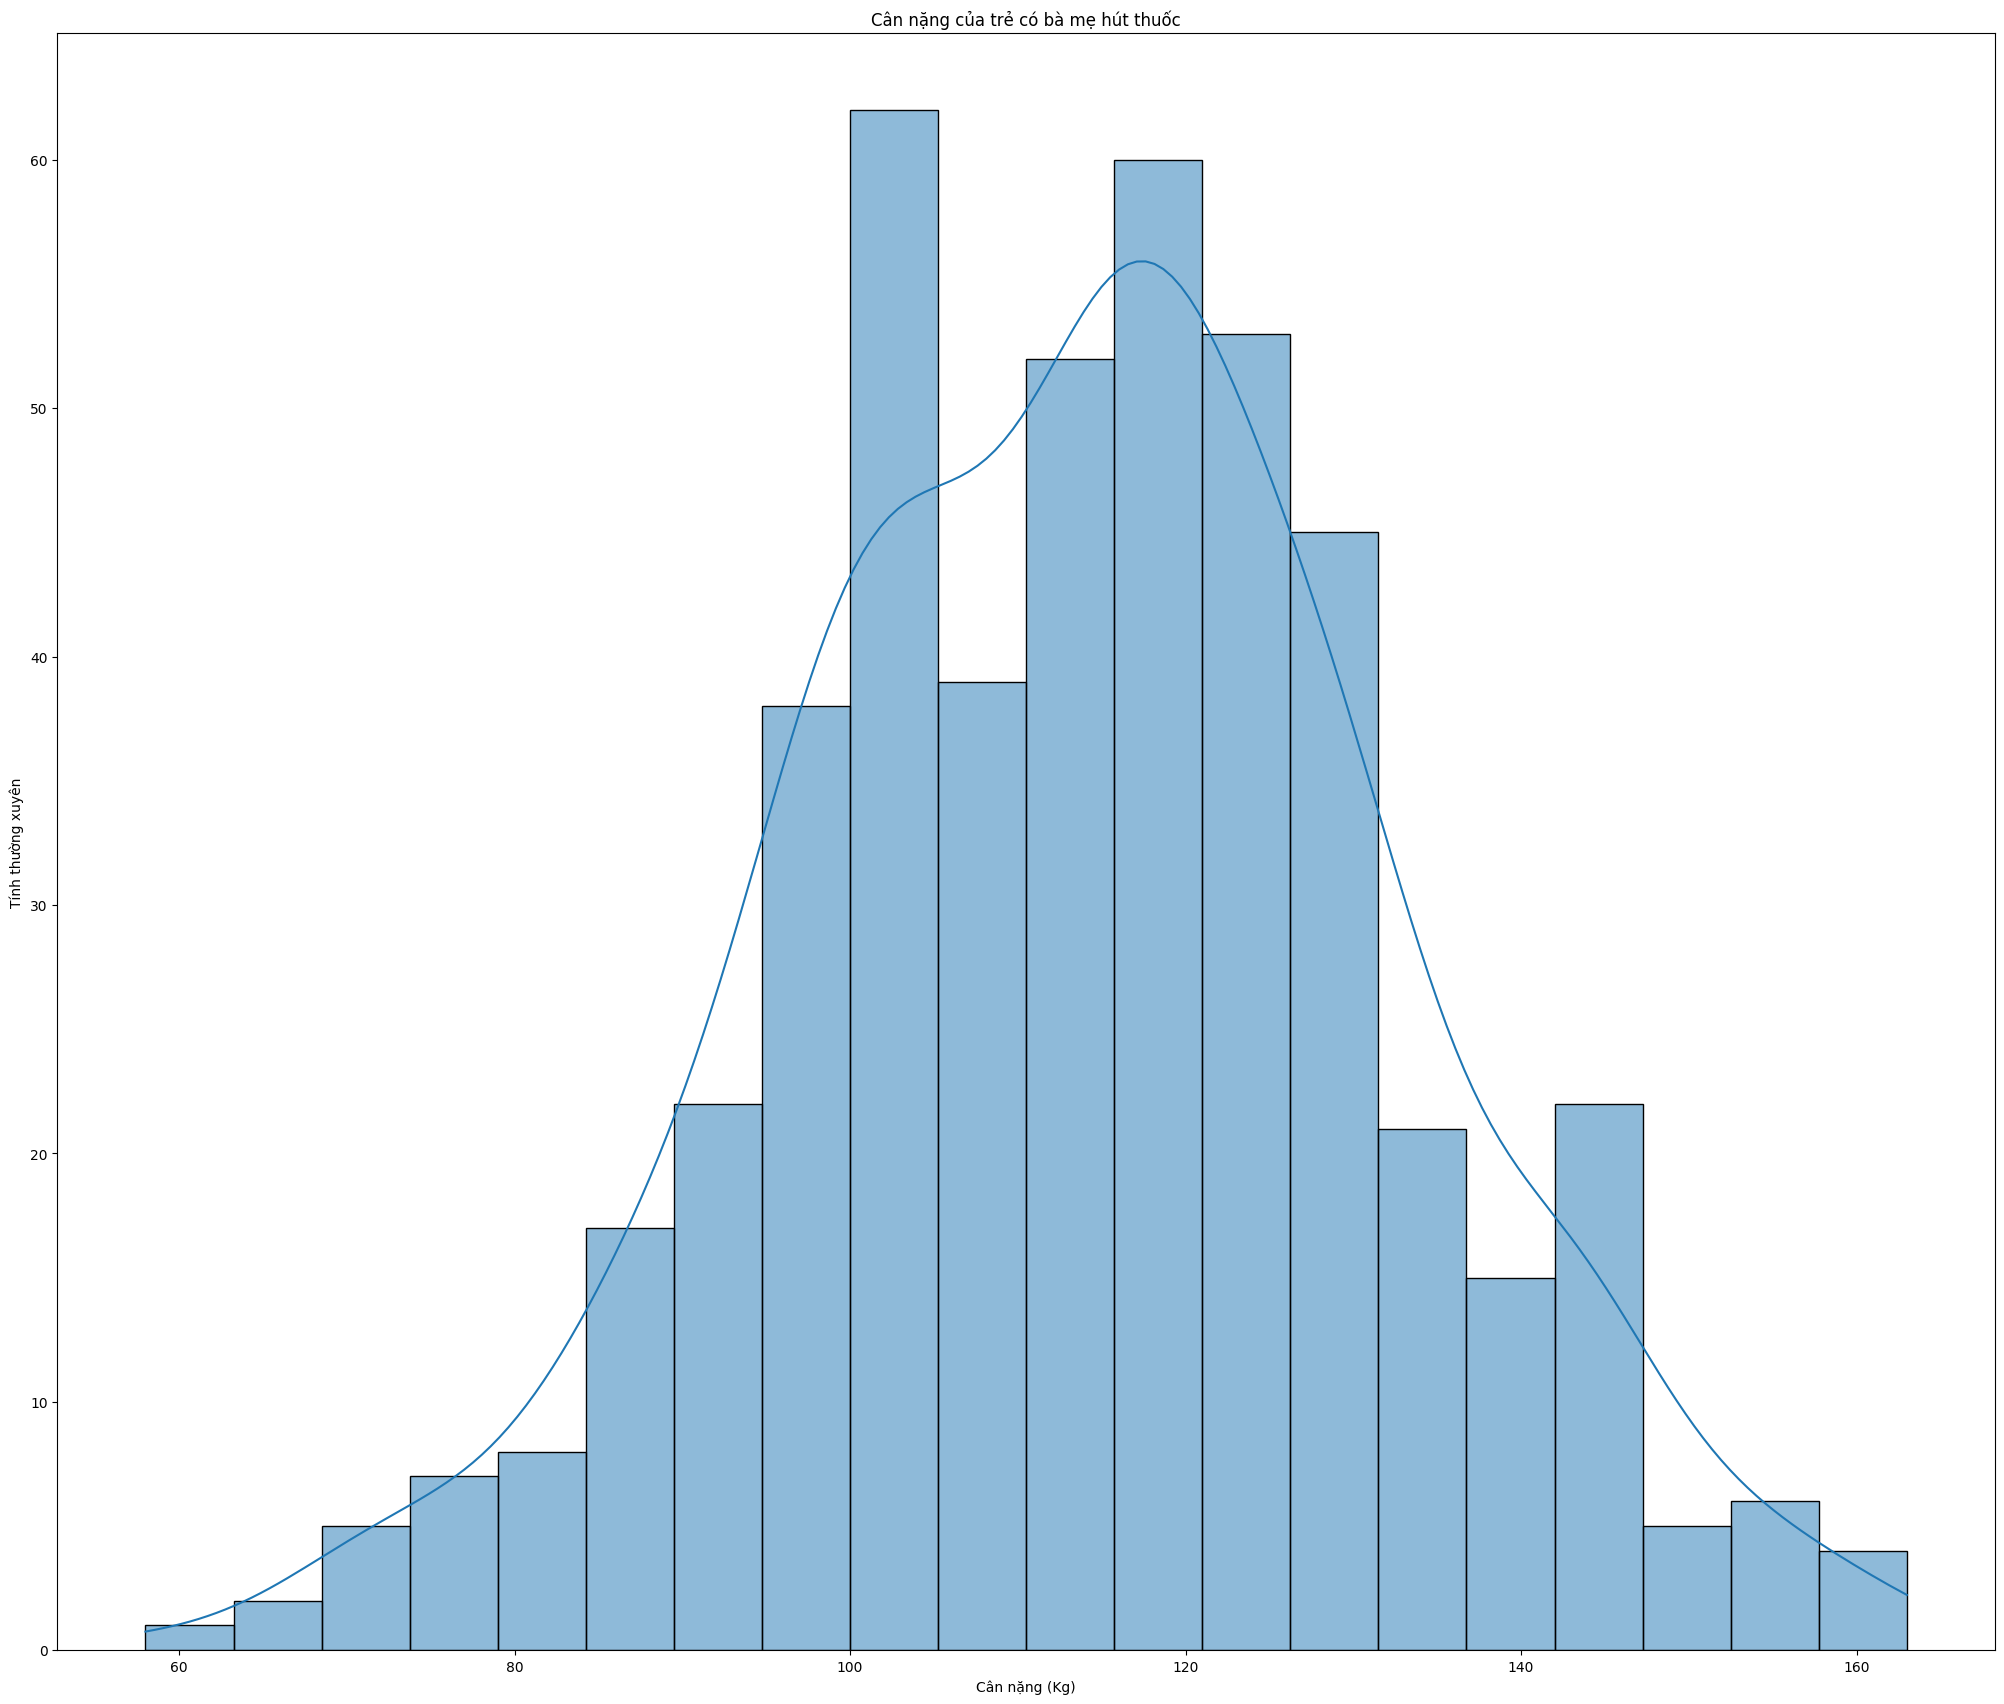

In [316]:

plt.figure(figsize=(25, 21))
sns.histplot(data=smoke_data, x='bwt', bins=20, kde=True)
plt.title('Cân nặng của trẻ có bà mẹ hút thuốc')
plt.xlabel('Cân nặng (Kg)')
plt.ylabel('Tính thường xuyên')
plt.show()

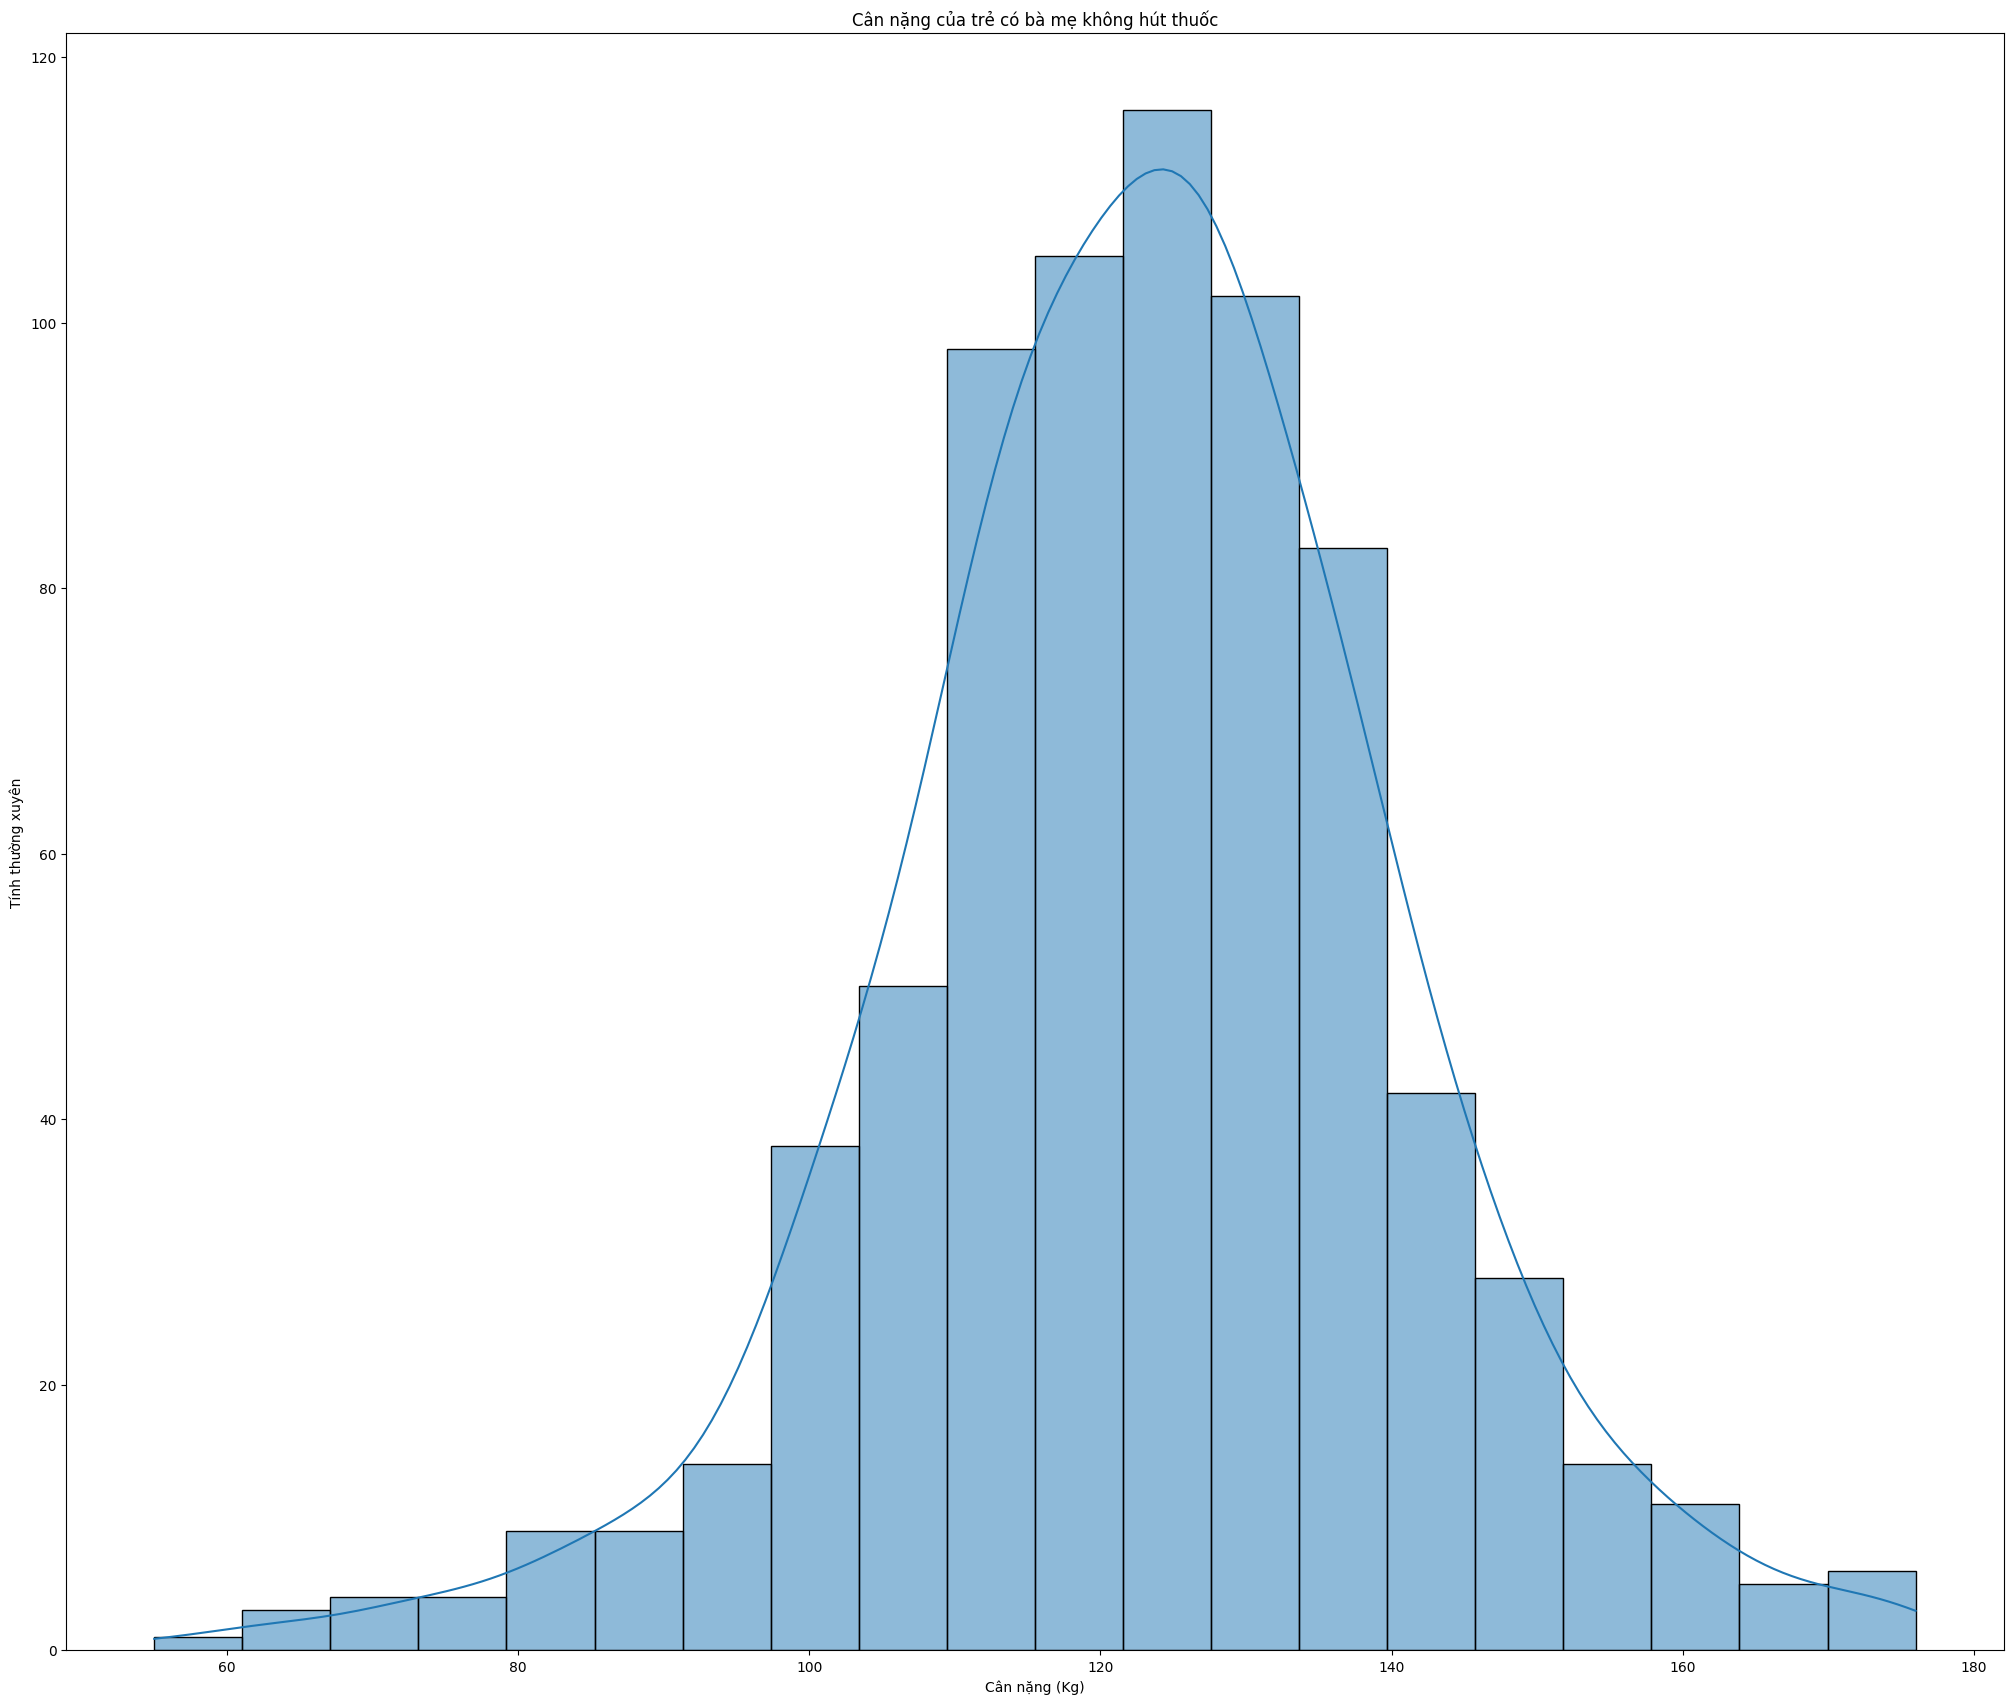

In [317]:
plt.figure(figsize=(25, 21))
sns.histplot(data=no_smoke_data, x='bwt', bins=20, kde=True)
plt.title('Cân nặng của trẻ có bà mẹ không hút thuốc')
plt.xlabel('Cân nặng (Kg)')
plt.ylabel('Tính thường xuyên')
plt.show()

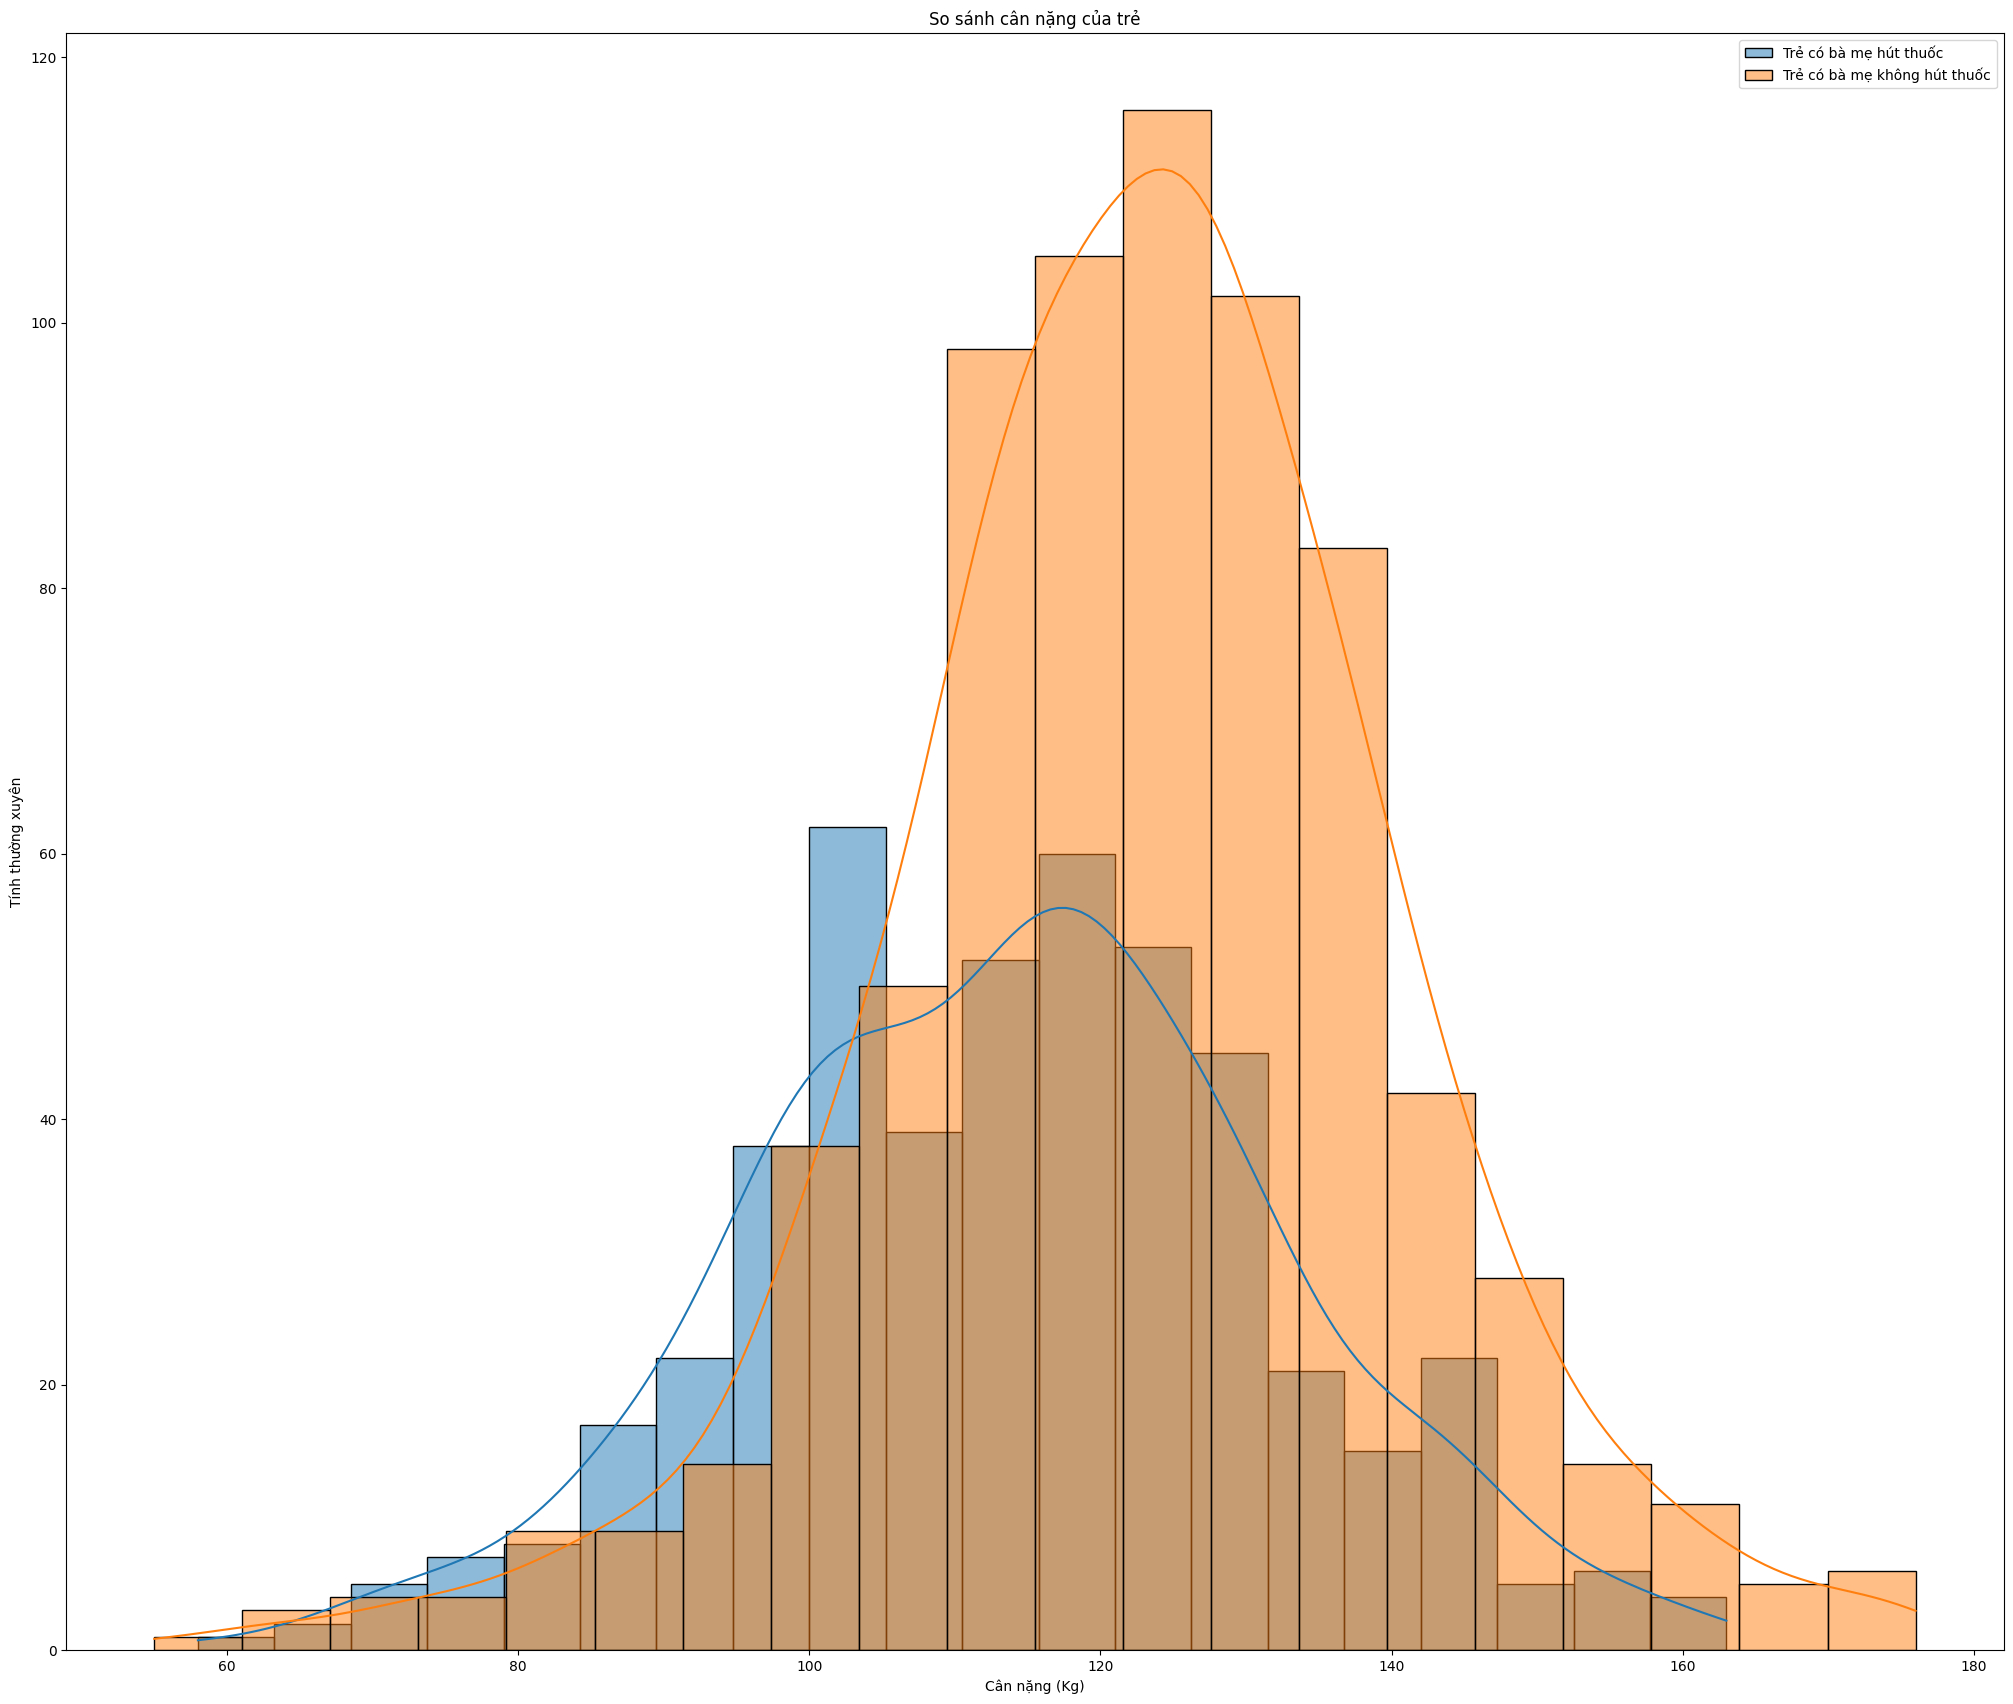

In [318]:
plt.figure(figsize=(25, 21))
sns.histplot(data=smoke_data, x='bwt', bins=20, kde=True, label='Trẻ có bà mẹ hút thuốc')
sns.histplot(data=no_smoke_data, x='bwt', bins=20, kde=True, label='Trẻ có bà mẹ không hút thuốc')
plt.title('So sánh cân nặng của trẻ')
plt.xlabel('Cân nặng (Kg)')
plt.ylabel('Tính thường xuyên')
plt.legend()
plt.show()

Nhận xét : 
Trẻ có bà mẹ hút thuốc : Như vậy dữ liệu hơi lệch về phía trái, và đỉnh nhọn, hai bên giảm với tốc độ vừa phải.
Trẻ có bà mẹ không hút thuốc : Như vậy dữ liệu phân bố điều ở phía trái, phía phải và đỉnh nhọn, hai bên giảm tốc độ vừa phải.